In [32]:
import argparse
from baselines.common.cmd_util import mujoco_arg_parser
from baselines import bench, logger
import gym
import sys
sys.path.append('/home/studio/Documents/aman/pictogram_agents/')
import starfish


In [33]:
env = gym.make('Starfish-SwimX-v0')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [34]:
env.reset()

array([-0.08882721, -0.09712388,  0.07487351, -0.03091776,  0.00892395,
       -0.07558108,  0.06856426, -0.09094948, -0.07211256, -0.0921928 ,
        0.08074083,  0.06517906,  0.05245676,  0.02997987,  0.06481756,
       -0.07784375, -0.06702651,  0.02766981, -0.07056381,  0.02235531,
       -0.08022185, -0.08021548,  0.01464828,  0.02129907,  0.08644172,
        0.07583452,  0.09091795,  0.09818674,  0.03996889,  0.03103615])

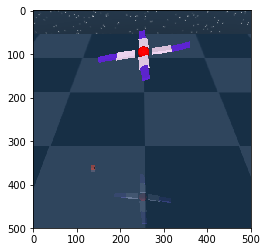

In [35]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :])

In [36]:
env.observation_space, env.action_space

(Box(30,), Box(24,))

In [37]:
from baselines.ppo2.policies import MlpPolicy
from baselines.ppo2 import ppo2

def init_model(observation_space, action_space, load_path,
               lam=0.95, gamma=0.99, noptepochs=10, 
               nsteps=2048, ent_coef=0.0, cliprange=0.2,
               vf_coef=0.5):
    model = ppo2.Model(policy=MlpPolicy, ob_space=observation_space,
                       ac_space=action_space, nbatch_act=1, nbatch_train=1,
                       nsteps=1, ent_coef=ent_coef, vf_coef=vf_coef, max_grad_norm=0.5)
    model.load(load_path)
    return model



In [38]:
import tensorflow as tf
import tqdm
import numpy as np
total_timesteps = 200

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.reset_default_graph()
with tf.Session(config=config).as_default():
    model = init_model(env.observation_space, env.action_space, './starfish_logs/checkpoints/00800')
    
    obs = env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    for timestep in tqdm.tqdm(range(total_timesteps)):
        if done:
            break
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = env.step(act)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)
        

Box(30,) Box(24,) 1


100%|██████████| 200/200 [00:16<00:00, 11.89it/s]


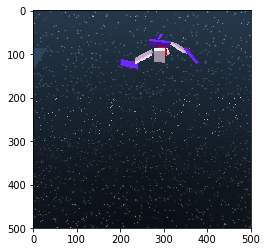

In [40]:
from matplotlib import animation
from IPython.display import HTML

def frames_2_anim(frames):
    fig = plt.figure()
    ax = plt.axes()
    line = ax.imshow(frames[0])

    def init():
        line.set_data(frames[0])
        return line,

    def animate(i):
        line.set_data(frames[i])
        return line,

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=200, interval=20)

    return HTML(anim.to_html5_video())

frames_2_anim(frames)

Box(30,) Box(24,) 1


100%|██████████| 200/200 [00:15<00:00, 12.65it/s]


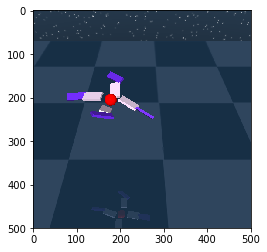

In [56]:
env.frame_skip = 2
env.model.opt.timestep = 0.01
env.reset()
env.model.body_pos[env.model.body_pos == env.get_body_com('target')] = 10.0
tf.reset_default_graph()
with tf.Session(config=config).as_default():
    model = init_model(env.observation_space, env.action_space, './starfish_logs/checkpoints/00800')
    
    obs = env.reset()
    obs = obs[np.newaxis, :]
    state = model.initial_state
    timestep = 0
    done = False
    frames = []
    for timestep in tqdm.tqdm(range(total_timesteps)):
        if done:
            break
        act, _, state, _ = model.step(obs, state, done)
        obs, reward, done, info = env.step(act)
        obs = obs[np.newaxis, :]
        timestep += 1
        frame = env.sim.render(500, 500, camera_name='tracking_top', depth=False)[::-1, :, :]
        frames.append(frame)

frames_2_anim(frames)

In [54]:
env.model.body_pos[env.model.body_pos == env.get_body_com('target')] = 1.0

In [57]:
env.get_body_com('target')

array([10., 10., 10.])